<a href="https://colab.research.google.com/github/GURJEW/tasks/blob/main/multi_dropdown_data_heatmap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Выбор отображаемых данных с помощью нескольких выпадающих списков



Dropdown(description='arg', options=(2, 3), value=2)

Dropdown(description='op', index=1, options=('div', 'mod'), value='mod')

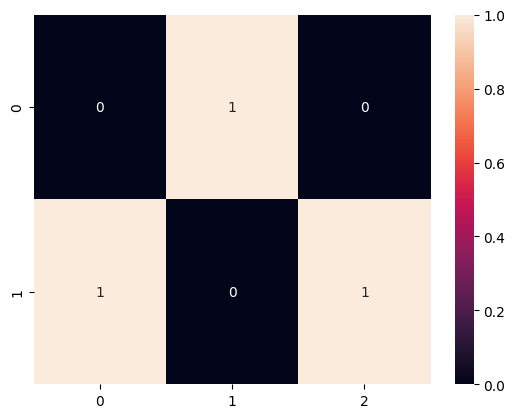

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ipywidgets import widgets
from IPython.display import display, clear_output

data = {
    i: dict(zip(['div', 'mod'], np.divmod(np.arange(6).reshape(2, 3), i)))
    for i in (2, 3)
}

def plot_data(op, arg):
    z = data[arg][op]
    sns.heatmap(z, annot=True)
    plt.show()

arg_widget = widgets.Dropdown(options=[2, 3], description='arg')
op_widget = widgets.Dropdown(options=['div', 'mod'], description='op')

# Обработчик события изменения значения аргументов
def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        clear_output(wait=True)  # Очистка вывода с сохранением предыдущего состояния
        display(arg_widget, op_widget)  # Отображение выпадающих списков снова
        plot_data(op_widget.value, arg_widget.value)

arg_widget.observe(on_change)
op_widget.observe(on_change)

# Используйте display, чтобы отобразить виджеты
display(arg_widget, op_widget)

# Инициируйте отображение с начальными значениями виджетов
plot_data(op_widget.value, arg_widget.value)

Dropdown(description='arg', index=1, options=(2, 3), value=3)

Dropdown(description='op', index=1, options=('div', 'mod'), value='mod')

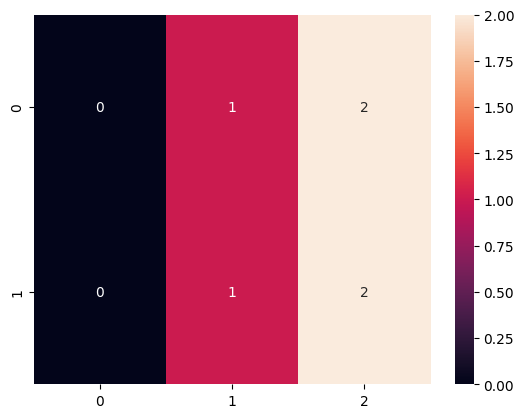

In [1]:
import numpy as np  # Импорт библиотеки numpy для работы с массивами
import seaborn as sns  # Импорт библиотеки seaborn для создания тепловых карт
import matplotlib.pyplot as plt  # Импорт библиотеки matplotlib для отображения графиков
import ipywidgets as widgets  # Импорт библиотеки ipywidgets для создания интерактивных виджетов
from IPython.display import display, clear_output  # Импорт функций для отображения и очистки вывода

class DataPlotter:
    """
    Класс для визуализации данных на основе деления и остатка от деления массива.

    Attributes:
        data (dict): Словарь, содержащий результаты операций div и mod для заданных аргументов.
        arg_widget (widgets.Dropdown): Виджет для выбора аргумента.
        op_widget (widgets.Dropdown): Виджет для выбора операции.
    """
    def __init__(self):
        """
        Инициализация объекта DataPlotter.
        """
        self.data = {
            i: dict(zip(['div', 'mod'], np.divmod(np.arange(6).reshape(2, 3), i)))
            for i in (2, 3)
        }  # Создание данных для визуализации

        self.arg_widget = widgets.Dropdown(options=[2, 3], description='arg')  # Виджет для выбора аргумента
        self.op_widget = widgets.Dropdown(options=['div', 'mod'], description='op')  # Виджет для выбора операции

        self.arg_widget.observe(self.on_change, names='value')  # Добавление обработчика изменений для виджета аргумента
        self.op_widget.observe(self.on_change, names='value')  # Добавление обработчика изменений для виджета операции

    def plot_data(self, op, arg):
        """
        Построение тепловой карты для выбранной операции и аргумента.

        Parameters:
            op (str): Операция ('div' или 'mod').
            arg (int): Аргумент (2 или 3).
        """
        z = self.data[arg][op]  # Получение данных для выбранной операции и аргумента
        sns.heatmap(z, annot=True)  # Построение тепловой карты с аннотациями
        plt.show()  # Отображение графика

    def on_change(self, change):
        """
        Обработчик события изменения значения аргументов.

        Parameters:
            change (dict): Словарь с информацией о событии изменения.
        """
        if change['type'] == 'change' and change['name'] == 'value':
            clear_output(wait=True)  # Очистка вывода с сохранением предыдущего состояния
            display(self.arg_widget, self.op_widget)  # Отображение виджетов снова
            self.plot_data(self.op_widget.value, self.arg_widget.value)  # Построение графика с новыми значениями

    def display_widgets(self):
        """
        Отображение виджетов и начальное построение графика.
        """
        display(self.arg_widget, self.op_widget)  # Отображение виджетов
        self.plot_data(self.op_widget.value, self.arg_widget.value)  # Построение графика с начальными значениями виджетов


# Создание экземпляра класса DataPlotter и отображение виджетов
plotter = DataPlotter()
plotter.display_widgets()